In [105]:
### important packages which helps EDA part
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [106]:
df=pd.read_csv("B:\\standfort_statistal_learning\\participant_files\\participant_files\\training_data.csv")

In [107]:
df.head()

,id,diagnosis_date,gleason_score,t_score,n_score,m_score,stage,age,race,height,...,symptoms,rd_thrpy,h_thrpy,chm_thrpy,cry_thrpy,brch_thrpy,rad_rem,multi_thrpy,survival_1_year,survival_7_years
0,1,Jun-05,4.0,T1c,N0,M0,I,86.0,4.0,66.0,...,U03,0,0,1,1,0,1,1,1,0
1,2,Feb-06,8.0,T3a,N1,M0,IV,66.0,2.0,70.0,...,"U06,S07",1,1,1,0,0,0,1,1,0
2,3,Mar-06,9.0,T1a,N0,M0,IIB,84.0,4.0,69.0,...,"U01,U02,U03,S10",1,1,0,0,1,1,1,1,1
3,4,Feb-05,8.0,T2b,N0,M0,IIB,86.0,3.0,69.0,...,"U01,U02,S10,O11",0,0,0,1,0,1,1,0,0
4,5,Dec-01,8.0,T4,N0,M0,IV,78.0,4.0,70.0,...,"U01,U03,U05,S07",1,1,1,0,0,0,1,1,0


In [108]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(18)

,Total,Percent
tumor_6_months,10063,0.654079
psa_6_months,9503,0.617680
psa_1_year,2517,0.163601
tumor_1_year,2123,0.137992
tea,1586,0.103087
first_degree_history,1586,0.103087
previous_cancer,1586,0.103087
smoker,1586,0.103087
family_history,1586,0.103087
psa_diagnosis,1398,0.090868


 if we look at the above giveatn table of missing value representation in each colunm it is clear proof that
 two colunms which has more than 60% of missing data it not good idea of fill the 60% of data hofrom 40% data information so that is reason i am  discard the **tumor_6_months** and **psa_6_months** colunms.

In [109]:
#delete the cabin feature/column and others previously stated to exclude in train dataset
drop_column = ['tumor_6_months','psa_6_months']
df.drop(drop_column, axis=1, inplace = True)

In [6]:
#def fetch_import_to_fillna(x):
 #   print(x.value_counts(),x.describe(),'median is',x.median(),'mode is',x.mode())
#fetch_import_to_fillna()

In [110]:
#complete race with mode
df['race'].fillna(df['race'].mode()[0], inplace = True)
#complete tumor_diagnosis  with median
df['tumor_diagnosis'].fillna(df['tumor_diagnosis'].median(), inplace = True)
df['gleason_score'].fillna(df['gleason_score'].median(), inplace = True)
df['age'].fillna(df['age'].mode()[0], inplace = True)
df['height'].fillna(df['height'].mode()[0], inplace = True)
df['weight'].fillna(df['weight'].mode()[0], inplace = True)
df['psa_diagnosis'].fillna(df['psa_diagnosis'].mode()[0], inplace = True)
df['family_history'].fillna(df['family_history'].median(), inplace = True)
df['smoker'].fillna(df['smoker'].median(), inplace = True)
df['previous_cancer'].fillna(df['previous_cancer'].mode()[0], inplace = True)
df['first_degree_history'].fillna(df['first_degree_history'].mode()[0], inplace = True)
df['tea'].fillna(df['tea'].mode()[0], inplace = True)
df['tumor_1_year'].fillna(df['tumor_1_year'].mode()[0], inplace = True)
df['psa_1_year'].fillna(df['psa_1_year'].mode()[0], inplace = True)

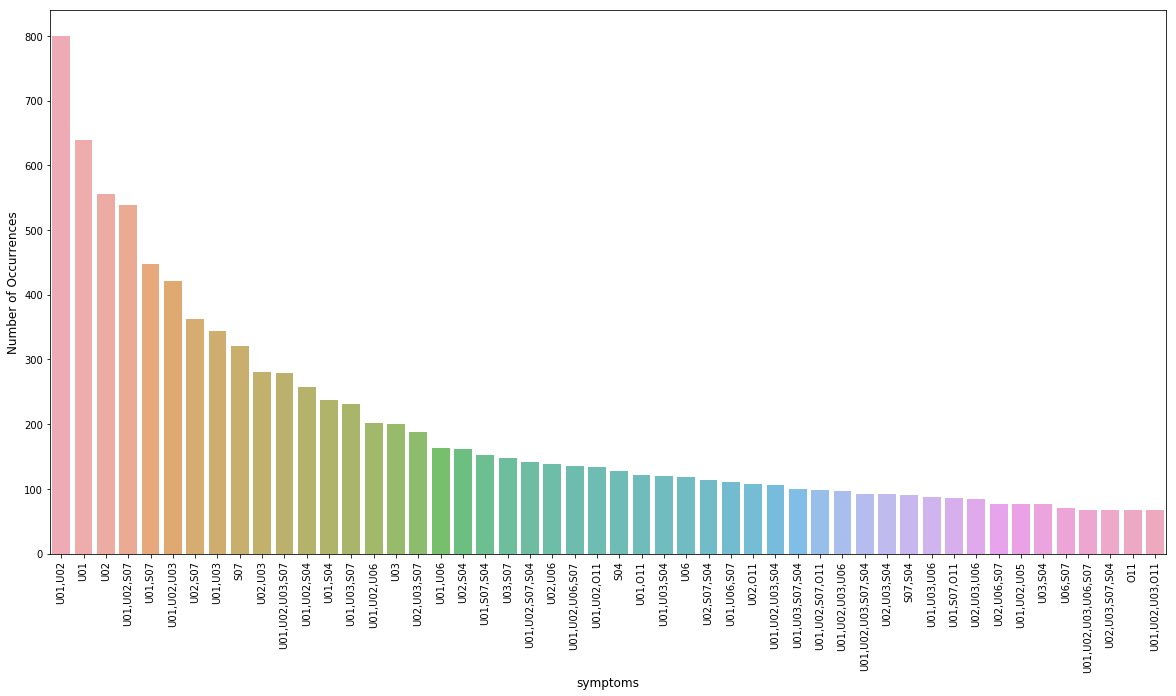

In [111]:
cnt_srs = df['symptoms'].value_counts().head(50)
plt.figure(figsize=(20,10))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('symptoms', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

## create new varibale based on Catergical data

### converting numerical data into catergical data 

In [112]:

df["race"] = df["race"].astype(str)
df["race"].replace('1.0','race_type_1',inplace=True)
df["race"].replace('2.0','race_type_2',inplace=True)
df["race"].replace('3.0','race_type_3',inplace=True)
df["race"].replace('4.0','race_type_4',inplace=True)

In [114]:
df=pd.get_dummies(df, columns=["t_score", "n_score","stage","m_score","race"], 
                              prefix=["t_score", "n_score","stage","m_score","r"])


In [115]:
df.head()

,id,diagnosis_date,gleason_score,age,height,weight,family_history,first_degree_history,previous_cancer,smoker,...,stage_III,stage_IV,m_score_M0,m_score_M1a,m_score_M1b,m_score_M1c,r_race_type_1,r_race_type_2,r_race_type_3,r_race_type_4
0,1,Jun-05,4.0,86.0,66.0,158.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
1,2,Feb-06,8.0,66.0,70.0,174.0,0.0,0.0,0.0,1.0,...,0,1,1,0,0,0,0,1,0,0
2,3,Mar-06,9.0,84.0,69.0,174.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
3,4,Feb-05,8.0,86.0,69.0,173.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0
4,5,Dec-01,8.0,78.0,70.0,201.0,1.0,1.0,0.0,0.0,...,0,1,1,0,0,0,0,0,0,1


In [116]:
encod=df['symptoms'].str.get_dummies(sep=',')

In [117]:
encod.head(10)

,O01,O08,O09,O10,O11,P01,P02,P03,S04,S07,S10,U01,U02,U03,U05,U06
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0
3,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0
5,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
6,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0
7,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
8,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
9,0,0,0,0,1,0,0,0,0,1,0,1,1,1,0,0


In [13]:
new_df=pd.concat([df,encod],axis=1)

In [118]:
new_df.head()

,id,gleason_score,age,height,weight,family_history,first_degree_history,previous_cancer,smoker,side,...,P02,P03,S04,S07,S10,U01,U02,U03,U05,U06
0,1,4.0,Elder,66.0,Low_weight,0.0,0.0,0.0,0.0,both,...,0,0,0,0,0,0,0,1,0,0
1,2,8.0,Elder,70.0,Normal_weight,0.0,0.0,0.0,1.0,both,...,0,0,0,1,0,0,0,0,0,1
2,3,9.0,Elder,69.0,Normal_weight,0.0,0.0,0.0,0.0,right,...,0,0,0,0,1,1,1,1,0,0
3,4,8.0,Elder,69.0,Normal_weight,0.0,0.0,0.0,0.0,right,...,0,0,0,0,1,1,1,0,0,0
4,5,8.0,Elder,70.0,Normal_weight,1.0,1.0,0.0,0.0,left,...,0,0,0,1,0,1,0,1,1,0


In [132]:
drop_column = ['tumor_1_year']
new_df.drop(drop_column, axis=1, inplace = True)

In [123]:
new_df.isnull().sum().sort_values(ascending=False).head(4)

U06            0
t_score_T3c    0
t_score_T3a    0
t_score_T2c    0
dtype: int64

### remove the catergerical various **symptoms**

In [125]:
d=['diagnosis_date','symptoms']
new_df.drop(d, axis=1, inplace = True)

In [48]:
new_df.head()

,id,gleason_score,age,height,weight,family_history,first_degree_history,previous_cancer,smoker,side,...,P02,P03,S04,S07,S10,U01,U02,U03,U05,U06
0,1,4.0,Elder,66.0,158.0,0.0,0.0,0.0,0.0,both,...,0,0,0,0,0,0,0,1,0,0
1,2,8.0,Elder,70.0,174.0,0.0,0.0,0.0,1.0,both,...,0,0,0,1,0,0,0,0,0,1
2,3,9.0,Elder,69.0,174.0,0.0,0.0,0.0,0.0,right,...,0,0,0,0,1,1,1,1,0,0
3,4,8.0,Elder,69.0,173.0,0.0,0.0,0.0,0.0,right,...,0,0,0,0,1,1,1,0,0,0
4,5,8.0,Elder,70.0,201.0,1.0,1.0,0.0,0.0,left,...,0,0,0,1,0,1,0,1,1,0



'Gleason_size' is the next variable in the list. our hypothesis is see which medium size of gleason score has high dead rate.Personally, I don't have any special intuition about Large size of gleason score, since they are the most vulnerable. This can play for both sides: either people has large gleason score elder they are more vulnerable, or they they are not able to protected them self with higher score of gleason which lead to dead

Let's call the usual suspect (bar plot) to help us understanding the situation.


In [154]:
# Bin data
new_df['gleason_score_bin'] = pd.cut(df['gleason_score'], bins=[0, 5, 10, 20], labels=['Small','Medium','Large'])
new_df['gleason_score_bin'].head()

0     Small
1    Medium
2    Medium
3    Medium
4    Medium
Name: gleason_score_bin, dtype: category
Categories (3, object): [Small < Medium < Large]

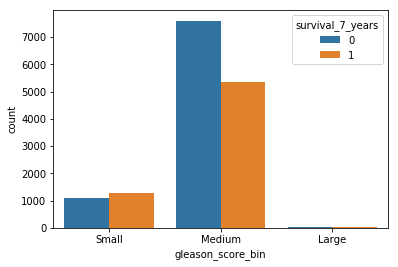

In [152]:
sns.countplot('gleason_score_bin',hue='survival_7_years',data=new_df)

### Age

'Age' is the next variable in the list. Our hypothesis is that children are more prone to survive, while people in its adult life may have a lower rate of survival. Personally, I don't have any special intuition about elders, since they are the most vulnerable. This can play for both sides: either people help elders because they are more vulnerable, or they they are not able to cope with the challenges posed by the wreck of a ship.

Let's call the usual suspect (bar plot) to help us understanding the situation.

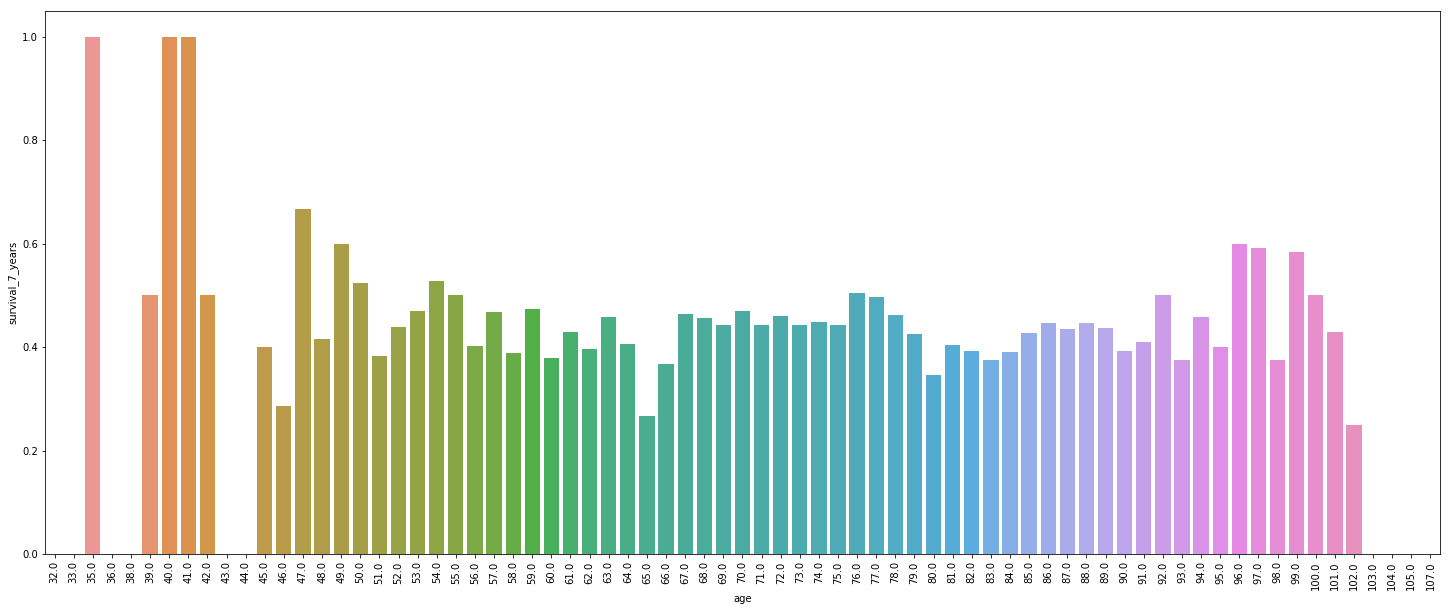

In [38]:
plt.figure(figsize=(25,10))
sns.barplot(df['age'],df['survival_7_years'], ci=None)
plt.xticks(rotation=90)

With a little bit of creativity, we can say that the plot has three regions:

One region that goes between age 0 and 15;

One between age 15 and 48

A last one between age 48 and 100.

I know that this division is arguable, especially in what concerns the last two categories. However, the point is that this categories split fits into what we know about the way our society is organized: childrens, adults and elders. For now, let's proceed this way.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72]), <a list of 73 Text xticklabel objects>)

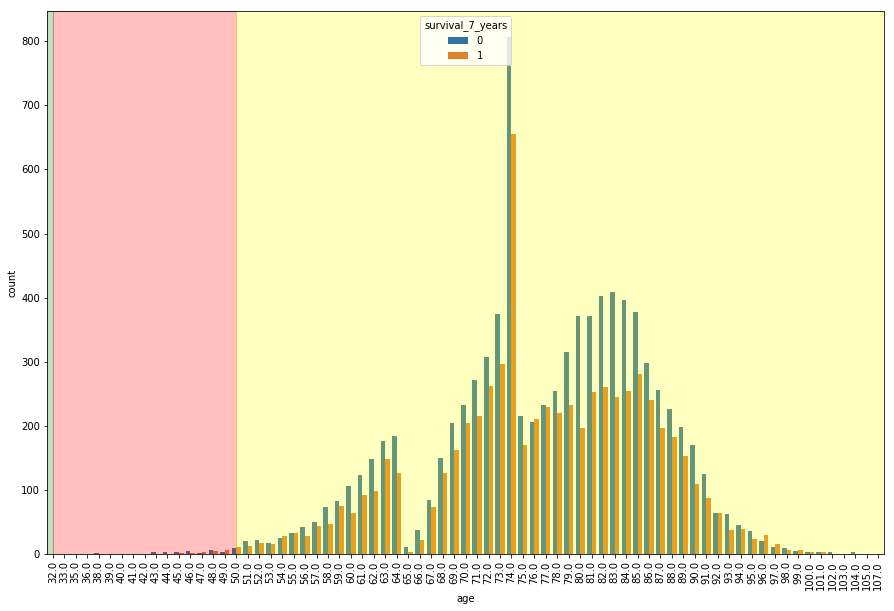

In [58]:
limit_1 = 12
limit_2 = 50

x_limit_1 = np.size(df[df['age'] < limit_1]['age'].unique())
x_limit_2 = np.size(df[df['age'] < limit_2]['age'].unique())

plt.figure(figsize=(15,10))
#sns.barplot(df['age'],df['survival_7_years'], ci=None)
sns.countplot('age',hue='survival_7_years',data=df)
plt.axvspan(-1, x_limit_1, alpha=0.25, color='green')
plt.axvspan(x_limit_1, x_limit_2, alpha=0.25, color='red')
plt.axvspan(x_limit_2, 100, alpha=0.25, color='yellow')

plt.xticks(rotation=90)

#### by looking at the above plot it make a proof that the dead rate is high in older age

In [44]:
# Bin data
new_df['age'] = pd.cut(df['age'], bins=[0, 12, 50, 200], labels=['Child','Adult','Elder'])
new_df['age'].head()

0    Elder
1    Elder
2    Elder
3    Elder
4    Elder
Name: age, dtype: category
Categories (3, object): [Child < Adult < Elder]

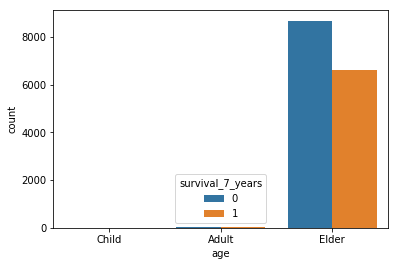

In [47]:
sns.countplot('age',hue='survival_7_years',data=new_df)

Height

In [60]:
df["height"].value_counts()

69.0    6274
70.0    3700
68.0    3000
71.0    1277
67.0     801
72.0     229
66.0      85
73.0      14
65.0       5
Name: height, dtype: int64

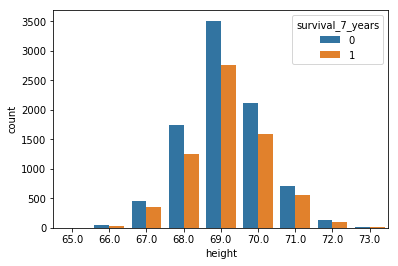

In [61]:
sns.countplot('height',hue='survival_7_years',data=new_df)

As we can see, when 'Height' is between 65 and 73, our hypothesis finds some support.

However, when height is between 67 and 73, things start to change. Despite the large variability of the results, the survival rate drops. This may suggest that our hypothesis should be revised when 'height' is higher than 69.

This variable seems to be more complex than expected. Accordingly, we will not make any transformation in this variable and we will leave it as a continuous variable to preserve all the information it has.

## Weight factor

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157]), <a list of 158 Text xticklabel objects>)

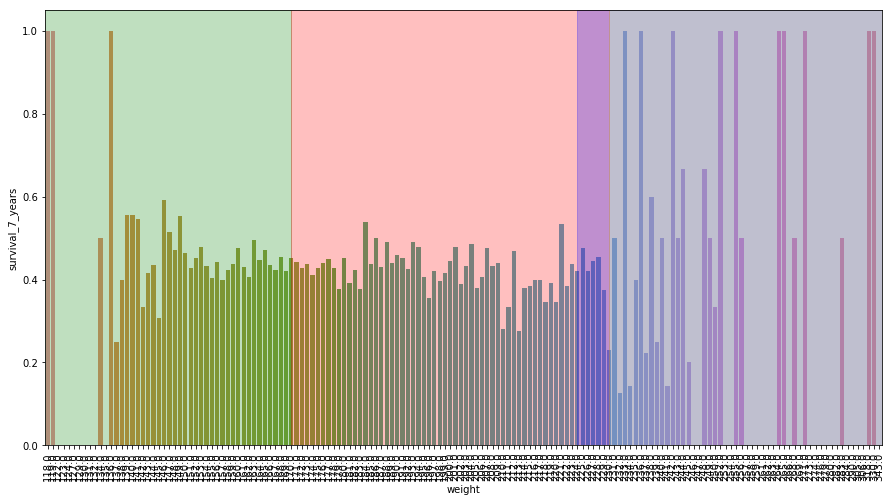

In [76]:
limit_1 = 170
limit_2 = 230
limit_3 = 450

x_limit_1 = np.size(df[df['weight'] < limit_1]['weight'].unique())
x_limit_2 = np.size(df[df['weight'] < limit_2]['weight'].unique())
x_limit_3 = np.size(df[df['weight'] < limit_3]['weight'].unique())
plt.figure(figsize=(15,8))
sns.barplot(df['weight'],df['survival_7_years'], ci=None)

plt.axvspan(-1, x_limit_1, alpha=0.25, color='green')
plt.axvspan(x_limit_1, x_limit_2, alpha=0.25, color='red')
plt.axvspan(x_limit_2,x_limit_3,alpha=0.25, color='yellow')
plt.axvspan(x_limit_3,100, alpha=0.25, color='blue')
plt.xticks(rotation=90)

In [78]:
# Bin data
new_df['weight'] = pd.cut(new_df['weight'], bins=[0, 170, 230, 400], 
                          labels=['Low_weight','Normal_weight','overweight'])
new_df['weight'].head()

0       Low_weight
1    Normal_weight
2    Normal_weight
3    Normal_weight
4    Normal_weight
Name: weight, dtype: category
Categories (3, object): [Low_weight < Normal_weight < overweight]

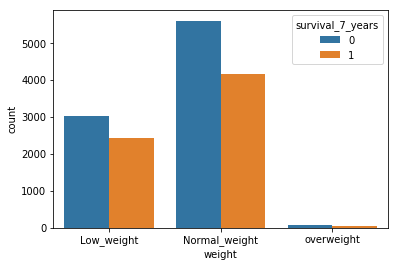

In [79]:
sns.countplot('weight',hue='survival_7_years',data=new_df)

In [80]:
new_df.head()

,id,gleason_score,age,height,weight,family_history,first_degree_history,previous_cancer,smoker,side,...,P02,P03,S04,S07,S10,U01,U02,U03,U05,U06
0,1,4.0,Elder,66.0,Low_weight,0.0,0.0,0.0,0.0,both,...,0,0,0,0,0,0,0,1,0,0
1,2,8.0,Elder,70.0,Normal_weight,0.0,0.0,0.0,1.0,both,...,0,0,0,1,0,0,0,0,0,1
2,3,9.0,Elder,69.0,Normal_weight,0.0,0.0,0.0,0.0,right,...,0,0,0,0,1,1,1,1,0,0
3,4,8.0,Elder,69.0,Normal_weight,0.0,0.0,0.0,0.0,right,...,0,0,0,0,1,1,1,0,0,0
4,5,8.0,Elder,70.0,Normal_weight,1.0,1.0,0.0,0.0,left,...,0,0,0,1,0,1,0,1,1,0


In [82]:
new_df.columns

Index([u'id', u'gleason_score', u'age', u'height', u'weight',
       u'family_history', u'first_degree_history', u'previous_cancer',
       u'smoker', u'side', u'tumor_diagnosis', u'tumor_1_year',
       u'psa_diagnosis', u'psa_1_year', u'tea', u'rd_thrpy', u'h_thrpy',
       u'chm_thrpy', u'cry_thrpy', u'brch_thrpy', u'rad_rem', u'multi_thrpy',
       u'survival_1_year', u'survival_7_years', u't_score_T1a', u't_score_T1b',
       u't_score_T1c', u't_score_T2a', u't_score_T2b', u't_score_T2c',
       u't_score_T3a', u't_score_T3b', u't_score_T3c', u't_score_T4',
       u'n_score_N0', u'n_score_N1', u'n_score_NX', u'stage_I', u'stage_IIA',
       u'stage_IIB', u'stage_III', u'stage_IV', u'm_score_M0', u'm_score_M1a',
       u'm_score_M1b', u'm_score_M1c', u'race_race_type_1',
       u'race_race_type_2', u'race_race_type_3', u'race_race_type_4', u'O01',
       u'O08', u'O09', u'O10', u'O11', u'P01', u'P02', u'P03', u'S04', u'S07',
       u'S10', u'U01', u'U02', u'U03', u'U05', u'U06'],
 

In [143]:
df['psa_1_year'].value_counts()

0.0     3522
9.6       96
11.5      91
7.4       89
6.2       88
8.6       88
7.7       88
8.2       86
11.8      86
11.3      86
9.8       85
7.8       85
5.1       85
10.8      85
9.3       84
10.3      84
9.2       84
10.0      84
6.6       83
10.9      83
7.6       83
10.4      82
8.7       82
9.1       81
10.1      81
10.6      81
12.0      81
8.3       80
6.3       80
8.4       80
        ... 
23.8       3
24.9       3
25.9       3
24.8       3
25.2       2
25.5       2
26.8       2
29.2       2
24.6       2
24.3       2
25.1       2
26.6       2
25.3       1
25.4       1
28.4       1
26.2       1
28.6       1
32.6       1
26.4       1
29.8       1
27.5       1
29.9       1
25.7       1
28.7       1
25.8       1
25.6       1
23.4       1
29.4       1
27.3       1
27.1       1
Name: psa_1_year, Length: 286, dtype: int64

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149]),
 <a list of 150 Text xticklabel objects>)

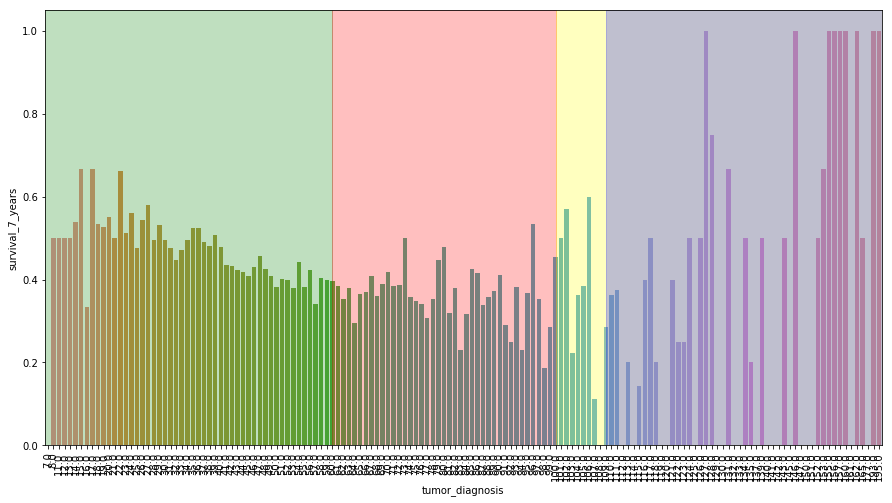

In [86]:
limit_1 = 60
limit_2 = 100
limit_3 = 250

x_limit_1 = np.size(df[df['tumor_diagnosis'] < limit_1]['tumor_diagnosis'].unique())
x_limit_2 = np.size(df[df['tumor_diagnosis'] < limit_2]['tumor_diagnosis'].unique())
x_limit_3 = np.size(df[df['tumor_diagnosis'] < limit_3]['tumor_diagnosis'].unique())
plt.figure(figsize=(15,8))
sns.barplot(df['tumor_diagnosis'],df['survival_7_years'], ci=None)

plt.axvspan(-1, x_limit_1, alpha=0.25, color='green')
plt.axvspan(x_limit_1, x_limit_2, alpha=0.25, color='red')
plt.axvspan(x_limit_2,x_limit_3,alpha=0.25, color='yellow')
plt.axvspan(x_limit_3,100, alpha=0.25, color='blue')
plt.xticks(rotation=90)

In [87]:
# Bin data
new_df['tumor_diagnosis'] = pd.cut(new_df['tumor_diagnosis'], bins=[0, 65, 100, 200], 
                          labels=['Normal','Large','abnormal'])
new_df['tumor_diagnosis'].head()

0       Large
1      Normal
2      Normal
3    abnormal
4       Large
Name: tumor_diagnosis, dtype: category
Categories (3, object): [Normal < Large < abnormal]

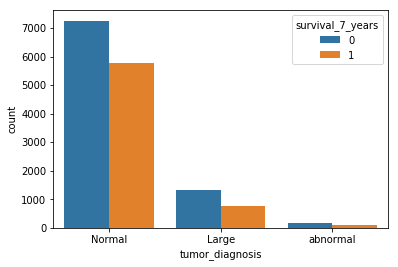

In [90]:
sns.countplot('tumor_diagnosis',hue='survival_7_years',data=new_df)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169]), <a list of 170 Text xticklabel objec

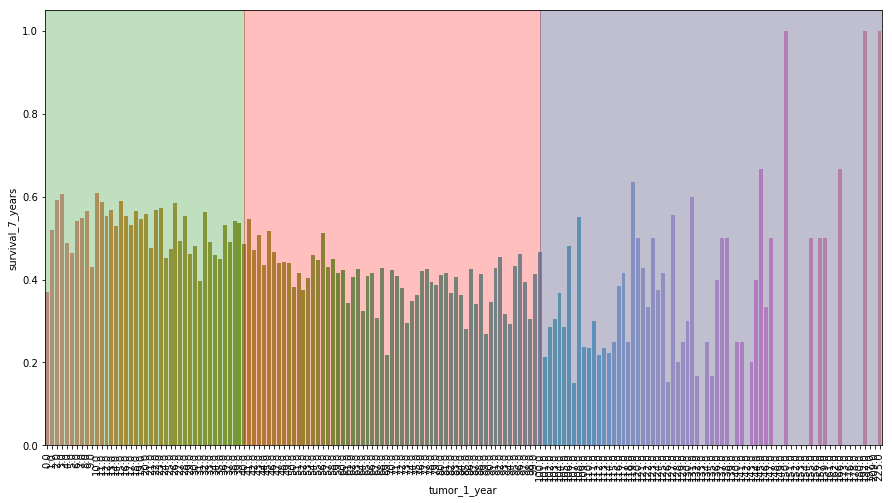

In [120]:
limit_1 = 40
limit_2 = 100
limit_3 = 350

x_limit_1 = np.size(df[df['tumor_1_year'] < limit_1]['tumor_1_year'].unique())
x_limit_2 = np.size(df[df['tumor_1_year'] < limit_2]['tumor_1_year'].unique())
x_limit_3 = np.size(df[df['tumor_1_year'] < limit_3]['tumor_1_year'].unique())
plt.figure(figsize=(15,8))
sns.barplot(df['tumor_1_year'],df['survival_7_years'], ci=None)

plt.axvspan(-1, x_limit_1, alpha=0.25, color='green')
plt.axvspan(x_limit_1, x_limit_2, alpha=0.25, color='red')
plt.axvspan(x_limit_2,x_limit_3,alpha=0.25, color='yellow')
plt.axvspan(x_limit_3,100, alpha=0.25, color='blue')
plt.xticks(rotation=90)

In [133]:
new_df['tumor_1_year'] = pd.cut(df['tumor_1_year'], bins=[-1,65,100,200], 
                          labels=['Normal','Large','abnormal'])
new_df['tumor_1_year'].head()

0    Normal
1    Normal
2     Large
3    Normal
4     Large
Name: tumor_1_year, dtype: category
Categories (3, object): [Normal < Large < abnormal]

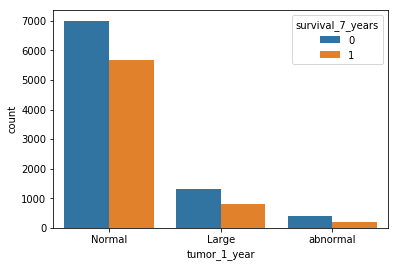

In [139]:
sns.countplot('tumor_1_year',hue='survival_7_years',data=new_df)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

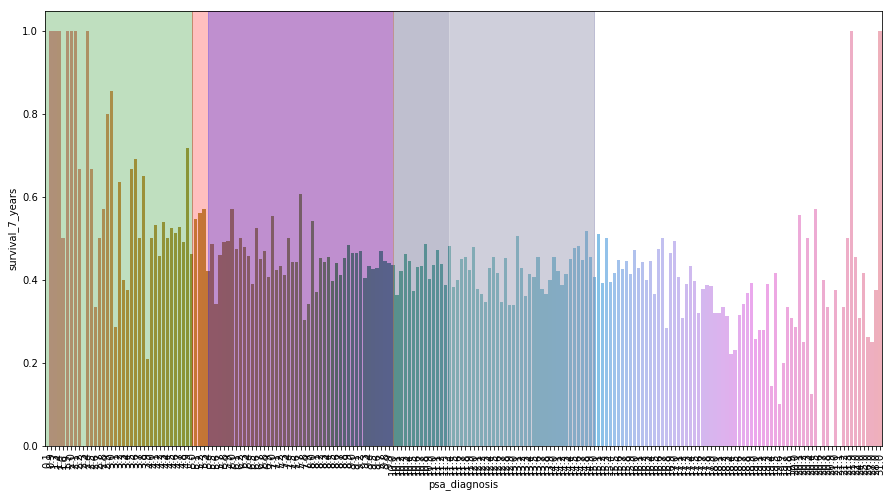

In [145]:
limit_1 = 5
limit_2 = 10
limit_3 = 15
limit_4 = 40

x_limit_1 = np.size(df[df['psa_diagnosis'] < limit_1]['psa_diagnosis'].unique())
x_limit_2 = np.size(df[df['psa_diagnosis'] < limit_2]['psa_diagnosis'].unique())
x_limit_3 = np.size(df[df['psa_diagnosis'] < limit_3]['psa_diagnosis'].unique())
x_limit_4 = np.size(df[df['psa_diagnosis'] < limit_4]['psa_diagnosis'].unique())

plt.figure(figsize=(15,8))
sns.barplot(df['psa_diagnosis'],df['survival_7_years'], ci=None)

plt.axvspan(-1, x_limit_1, alpha=0.25, color='green')
plt.axvspan(x_limit_1, x_limit_2, alpha=0.25, color='red')
plt.axvspan(x_limit_2,x_limit_3,alpha=0.25, color='yellow')
plt.axvspan(x_limit_3,limit_4, alpha=0.25, color='blue')
plt.axvspan(x_limit_4,100, alpha=0.25, color='white')

plt.xticks(rotation=90)

In [141]:
new_df['psa_diagnosis'] = pd.cut(df['psa_diagnosis'], bins=[-1,5,10,15,35], 
                          labels=['L1','L2','L3','L4'])
new_df['psa_diagnosis'].head()

0    L2
1    L3
2    L4
3    L3
4    L4
Name: psa_diagnosis, dtype: category
Categories (4, object): [L1 < L2 < L3 < L4]

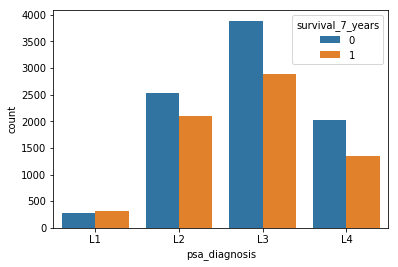

In [142]:
sns.countplot('psa_diagnosis',hue='survival_7_years',data=new_df)

### by seeing the count of dead rate using psa_diagnosis Level 3 has major count compare all other three level.

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

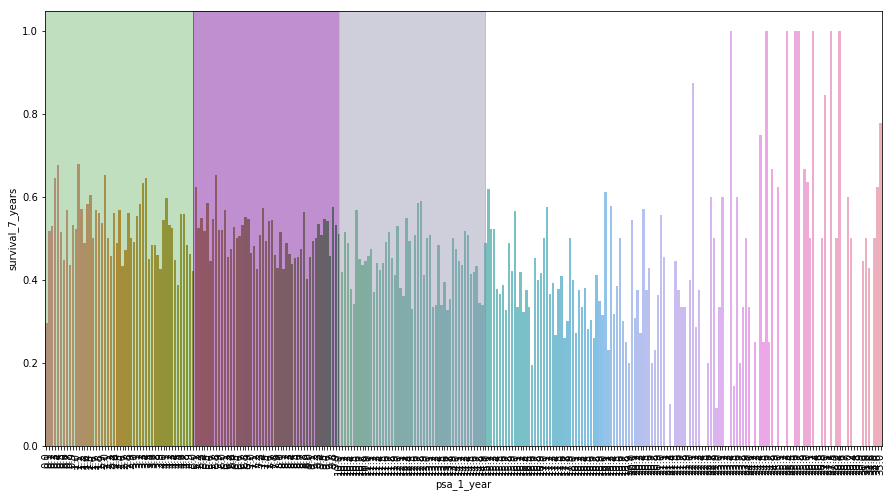

In [146]:
limit_1 = 5
limit_2 = 10
limit_3 = 15
limit_4 = 50

x_limit_1 = np.size(df[df['psa_1_year'] < limit_1]['psa_1_year'].unique())
x_limit_2 = np.size(df[df['psa_1_year'] < limit_2]['psa_1_year'].unique())
x_limit_3 = np.size(df[df['psa_1_year'] < limit_3]['psa_1_year'].unique())
x_limit_4 = np.size(df[df['psa_1_year'] < limit_4]['psa_1_year'].unique())

plt.figure(figsize=(15,8))
sns.barplot(df['psa_1_year'],df['survival_7_years'], ci=None)

plt.axvspan(-1, x_limit_1, alpha=0.25, color='green')
plt.axvspan(x_limit_1, x_limit_2, alpha=0.25, color='red')
plt.axvspan(x_limit_2,x_limit_3,alpha=0.25, color='yellow')
plt.axvspan(x_limit_3,limit_4, alpha=0.25, color='blue')
plt.axvspan(x_limit_4,100, alpha=0.25, color='white')

plt.xticks(rotation=90)

In [149]:
new_df['psa_1_year'] = pd.cut(df['psa_1_year'], bins=[-1,5,10,15,20,40], 
                          labels=['L1','L2','L3','L4','L5'])
new_df['psa_1_year'].head()

0    L1
1    L2
2    L4
3    L1
4    L1
Name: psa_1_year, dtype: category
Categories (5, object): [L1 < L2 < L3 < L4 < L5]

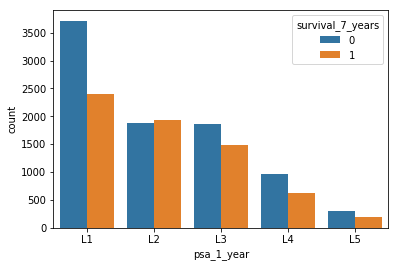

In [150]:
sns.countplot('psa_1_year',hue='survival_7_years',data=new_df)

### after year of psa level has major dead rate.

In [157]:
new_df=pd.get_dummies(new_df, columns=
                  ["psa_1_year","psa_diagnosis","tumor_1_year","tumor_diagnosis","age","weight","gleason_score_bin"], 
             prefix=["psa_1_year", "psa_diagnosis","tumor_1_year","tumor_diagnosis","age","weight","gleason"])


In [159]:
d=['gleason_score','side']
new_df.drop(d, axis=1, inplace = True)

In [160]:
new_df.head()

,id,height,family_history,first_degree_history,previous_cancer,smoker,tea,rd_thrpy,h_thrpy,chm_thrpy,...,tumor_diagnosis_abnormal,age_Child,age_Adult,age_Elder,weight_Low_weight,weight_Normal_weight,weight_overweight,gleason_Small,gleason_Medium,gleason_Large
0,1,66.0,0.0,0.0,0.0,0.0,2.0,0,0,1,...,0,0,0,1,1,0,0,1,0,0
1,2,70.0,0.0,0.0,0.0,1.0,4.0,1,1,1,...,0,0,0,1,0,1,0,0,1,0
2,3,69.0,0.0,0.0,0.0,0.0,0.0,1,1,0,...,0,0,0,1,0,1,0,0,1,0
3,4,69.0,0.0,0.0,0.0,0.0,2.0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
4,5,70.0,1.0,1.0,0.0,0.0,2.0,1,1,1,...,0,0,0,1,0,1,0,0,1,0


In [193]:
nc=new_df.select_dtypes(exclude = ["object"]).columns

print("Numerical features : " + str(len(nc)))

Numerical features : 83


In [210]:
#new_df.apply(pd.to_numeric)

In [200]:
d=['tumor_1_year3']
new_df.drop(d, axis=1, inplace = True)

## Variance Threshold

This feature selection algorithm looks only at the features (X). We set threshold 0.1 which lower than this threshold will be removed.

In [215]:
from sklearn.feature_selection import VarianceThreshold

mdlsel = VarianceThreshold(threshold=0.1)
mdlsel.fit(new_df)
ix = mdlsel.get_support()
#data1 = mdlsel.transform(train) 
data1 = pd.DataFrame(mdlsel.transform(new_df), columns = new_df.columns.values[ix])
data1.columns

Index([u'id', u'height', u'family_history', u'first_degree_history', u'tea',
       u'rd_thrpy', u'h_thrpy', u'chm_thrpy', u'cry_thrpy', u'brch_thrpy',
       u'rad_rem', u'multi_thrpy', u'survival_7_years', u't_score_T4',
       u'n_score_N0', u'n_score_N1', u'stage_IIA', u'stage_IIB', u'stage_III',
       u'stage_IV', u'race_race_type_2', u'race_race_type_4', u'O11', u'S04',
       u'S07', u'U01', u'U02', u'U03', u'U06', u'psa_1_year_L1',
       u'psa_1_year_L2', u'psa_1_year_L3', u'psa_diagnosis_L2',
       u'psa_diagnosis_L3', u'psa_diagnosis_L4', u'tumor_1_year_Normal',
       u'tumor_1_year_Large', u'tumor_diagnosis_Normal',
       u'tumor_diagnosis_Large', u'weight_Low_weight', u'weight_Normal_weight',
       u'gleason_Small', u'gleason_Medium'],
      dtype='object')

## Select K Best

Select features according to the k highest scores.

In [220]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = new_df.drop("survival_7_years",axis=1)
y = new_df["survival_7_years"]

mdlsel = SelectKBest(chi2, k=30) 
mdlsel.fit(X,y)
ix = mdlsel.get_support() 
data2 = pd.DataFrame(mdlsel.transform(X), columns = X.columns.values[ix]) # en iyi leri aldi... 7 tane...
data2.head(n=5)

,id,rd_thrpy,chm_thrpy,cry_thrpy,survival_1_year,t_score_T4,n_score_N0,n_score_N1,stage_I,stage_IIA,...,P01,P02,P03,S10,U05,psa_1_year_L1,psa_1_year_L2,tumor_1_year_abnormal,tumor_diagnosis_Large,gleason_Small
0,1,0,1,1,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,1,1
1,2,1,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,1,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,5,1,1,0,1,1,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0


In [221]:
data2.columns

Index([u'id', u'rd_thrpy', u'chm_thrpy', u'cry_thrpy', u'survival_1_year',
       u't_score_T4', u'n_score_N0', u'n_score_N1', u'stage_I', u'stage_IIA',
       u'stage_III', u'stage_IV', u'm_score_M0', u'm_score_M1a',
       u'm_score_M1b', u'm_score_M1c', u'O01', u'O08', u'O09', u'O10', u'P01',
       u'P02', u'P03', u'S10', u'U05', u'psa_1_year_L1', u'psa_1_year_L2',
       u'tumor_1_year_abnormal', u'tumor_diagnosis_Large', u'gleason_Small'],
      dtype='object')

## Logistic Regression

In [226]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#input and output
target = new_df['survival_7_years']
features = new_df[['height','family_history', 'first_degree_history',
       'previous_cancer', 'smoker', 'tea', 'rd_thrpy', 'h_thrpy',
       'chm_thrpy', 'cry_thrpy', 'brch_thrpy', 'rad_rem', 'multi_thrpy',
       'survival_1_year', 't_score_T1a', 't_score_T1b',
       't_score_T1c', 't_score_T2a', 't_score_T2b', 't_score_T2c',
       't_score_T3a', 't_score_T3b', 't_score_T3c', 't_score_T4',
       'n_score_N0', 'n_score_N1', 'n_score_NX', 'stage_I', 'stage_IIA',
       'stage_IIB', 'stage_III', 'stage_IV', 'm_score_M0', 'm_score_M1a',
       'm_score_M1b', 'm_score_M1c', 'race_race_type_1',
       'race_race_type_2', 'race_race_type_3', 'race_race_type_4', 'O01',
       'O08', 'O09', 'O10', 'O11', 'P01', 'P02', 'P03', 'S04', 'S07',
       'S10', 'U01', 'U02', 'U03', 'U05', 'U06',
       'psa_1_year_L1', 'psa_1_year_L2', 'psa_1_year_L3', 'psa_1_year_L4',
       'psa_1_year_L5', 'psa_diagnosis_L1', 'psa_diagnosis_L2',
       'psa_diagnosis_L3', 'psa_diagnosis_L4', 'tumor_1_year_Normal',
       'tumor_1_year_Large', 'tumor_1_year_abnormal',
       'tumor_diagnosis_Normal', 'tumor_diagnosis_Large',
       'tumor_diagnosis_abnormal', 'age_Child', 'age_Adult', 'age_Elder',
       'weight_Low_weight','weight_Normal_weight', 'weight_overweight',
       'gleason_Small', 'gleason_Medium','gleason_Large']]

#Build test and training test
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=42)


classifier = linear_model.LogisticRegression()
classifier_=classifier.fit(X_train,y_train)
target_predict=classifier_.predict(X_test)


print("Logistic Regression Score: ",accuracy_score(y_test,target_predict))

from sklearn.metrics import mean_squared_error, r2_score
print ("MSE    :",mean_squared_error(y_test,target_predict))


('Logistic Regression Score: ', 0.6618284228769498)
('MSE    :', 0.33817157712305024)


## i have bulid by using Logistic REgression and got accuracy of 66% 

### Polynomial Features

In [231]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#Build test and training test
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=42)
poly = preprocessing.PolynomialFeatures(degree=2,include_bias=False)
poly_features = poly.fit_transform(features)

classifier_ = classifier.fit(X_train,y_train)
print("Polynomial Features: ",accuracy_score(y_test,target_predict))

from sklearn.metrics import mean_squared_error, r2_score
print ("MSE    :",mean_squared_error(y_test,target_predict))
#print ("R2     :",r2_score(y_test,target_predict))

('Polynomial Features: ', 0.6618284228769498)
('MSE    :', 0.33817157712305024)


## Random forest model

In [238]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#target = train['Survived'].values
#data_features_names = ['Pclass','Sex','SibSp','Parch','Fare','Embarked','Age']
#features = train[data_features_names].values

#Build test and training test
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=42)

my_forest = RandomForestClassifier(max_depth=20, min_samples_split=30, n_estimators=1200, random_state=10,
                                   criterion = 'entropy')


my_forest_ = my_forest.fit(X_train,y_train)
target_predict=my_forest_.predict(X_test)

print("Random forest score: ",accuracy_score(y_test,target_predict))

from sklearn.metrics import mean_squared_error, r2_score
print ("MSE    :",mean_squared_error(y_test,target_predict))
#print ("R2     :",r2_score(y_test,target_predict))

('Random forest score: ', 0.6700606585788561)
('MSE    :', 0.32993934142114384)


## random Forest model gave 67% of accuracy

## Decision Tree Model

In [240]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



#Build test and training test
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=42)

decision_tree = tree.DecisionTreeClassifier(random_state=1,criterion = 'entropy',min_samples_split = 100)


decision_tree_ = decision_tree.fit(X_train,y_train)
target_predict=decision_tree_.predict(X_test)

print("Decision tree score: ",accuracy_score(y_test,target_predict))

from sklearn.metrics import mean_squared_error, r2_score
print ("MSE    :",mean_squared_error(y_test,target_predict))
#print ("R2     :",r2_score(y_test,target_predict))

('Decision tree score: ', 0.645580589254766)
('MSE    :', 0.354419410745234)


### Decision Tree model has given 64% of accuracy

Based on the model i have bulit random forest model is given the best result.